In [46]:
import numpy as np
import qutip as qt
import math
import matplotlib.pyplot as plt
from ipywidgets import interact
import ipywidgets as widgets

from q_solve import generate_result
from Schmidt_solve import compute_schmidt_states
from Schmidt_solve import compute_schmidt_full
from VN import plot_VN
from VN import compute_VN_time
from e_spectrum import plot_e_spectrum
from Neff import plot_Neff_schmidt_Neff_tot
from checkup import checkup
from overlap import plot_p_overlap_graph
from q_solve import generate_result_more
from make_gif import make_gif_distribs1s2_new
from make_gif import make_gif_distribs1s2_new_zoomed

from Neff import plot_Neff_schmidt
from Neff import plot_Neff_schmidt_Neff_tot
from Neff import plot_Neff_schmidt_Neff_tot_characterize


In [66]:
def occupation(tlist,result,eigenstates_total,eigenenergies_total,EI,w,eps=0.001):
    c1_t=[]
    c2_t=[]
    for idx in range(len(tlist)-1):
        state = compute_schmidt_full(result,idx+1,1)
        state2 = compute_schmidt_full(result,idx+1,2)
        energy_coeff=[abs(np.vdot(state, eigenstate)) ** 2 for eigenstate in eigenstates_total]
        energy_coeff2=[abs(np.vdot(state2, eigenstate)) ** 2 for eigenstate in eigenstates_total]
        count1 = sum(1 for coeff in energy_coeff if coeff > eps)
        count2 = sum(1 for coeff in energy_coeff2 if coeff > eps)
        c1_t.append(count1)
        c2_t.append(count2)
    plt.plot(tlist[0:len(tlist)-1], c1_t)
    plt.plot(tlist[0:len(tlist)-1], c2_t)
    plt.title(f"Plot of the occupation of Hilbert space by Schmidt1 and 2 over time for EI={EI}, w={w}, eps={eps}")
    plt.xlabel("Time")
    plt.ylabel("Count")
    plt.show()
    return c1_t, c2_t

def strd_dev_mean_simi_plot(result,eigenstates_total,eigenenergies_total,EI,w,env, plot = True):
    mean1_list=[]
    mean2_list=[]
    st1_tst1_list=[]
    st1_tst2_list=[]
    for idx in range(len(tlist)-1):
        state = compute_schmidt_full(result,idx+1,1)
        state2 = compute_schmidt_full(result,idx+1,2)
        energy_coeff=[abs(np.vdot(state, eigenstate)) ** 2 for eigenstate in eigenstates_total]
        energy_coeff2=[abs(np.vdot(state2, eigenstate)) ** 2 for eigenstate in eigenstates_total]
        
        mean1 = np.sum(np.array(energy_coeff) * np.array(eigenenergies_total))
        mean2 = np.sum(np.array(energy_coeff2) * np.array(eigenenergies_total))
        st1_tst1 = np.mean((np.array(energy_coeff) * np.array(eigenenergies_total)-mean1)**2)
        st1_tst2 = np.mean((np.array(energy_coeff2) * np.array(eigenenergies_total)-mean2)**2)
        mean1_list.append(mean1)
        mean2_list.append(mean2)
        st1_tst1_list.append(st1_tst1)
        st1_tst2_list.append(st1_tst2)
    
    if plot:
        plt.plot(tlist[1:len(tlist)], mean1_list)
        plt.plot(tlist[1:len(tlist)], mean2_list)
        plt.plot(tlist[1:len(tlist)], st1_tst1_list)
        plt.plot(tlist[1:len(tlist)], st1_tst2_list)

        plt.title(f"Plot of the means and standard dev of the distributions of Schmidt 1 and 2 EI={EI} and w={w} and env={env}")
        plt.xlabel("Time")
        plt.ylabel("Units of energy")
        plt.legend(["mean s1", "mean s2", "strd dev s1", "strd dev s2"])
    else :
        return mean1_list, mean2_list, st1_tst1_list, st1_tst2_list

In [67]:
#Trying to get exactly equal weights for both Schmidts.

#defining all quantities used in the simulation
d1, d2 = 10, 200
w = 0.41# smallest weight of the 2 eingestates, set btw 0 and 1
E_spacing = 1.0
Int_strength = 0.05
# Define the time settings for the simulation
tmax= 200
ind_nb = 300
q2=4
q1=2*(np.sqrt(w)/np.sqrt(1-w)-1)+q2*np.sqrt(w)/np.sqrt(1-w)
print(q1)
k0=round(q1)
k1=q2

3.001694628077805


In [68]:

result, tlist, H_q, H_system_2, H_system_1_ext, H_system_2_ext, H_interaction, H_total, ket_0, ket_1, initial_state_system_2 = generate_result_more(d1,d2,w, E_spacing, Int_strength, tmax, ind_nb,1,k0,k1)


In [69]:
eigenenergies_total, eigenstates_total = H_total.eigenstates() 


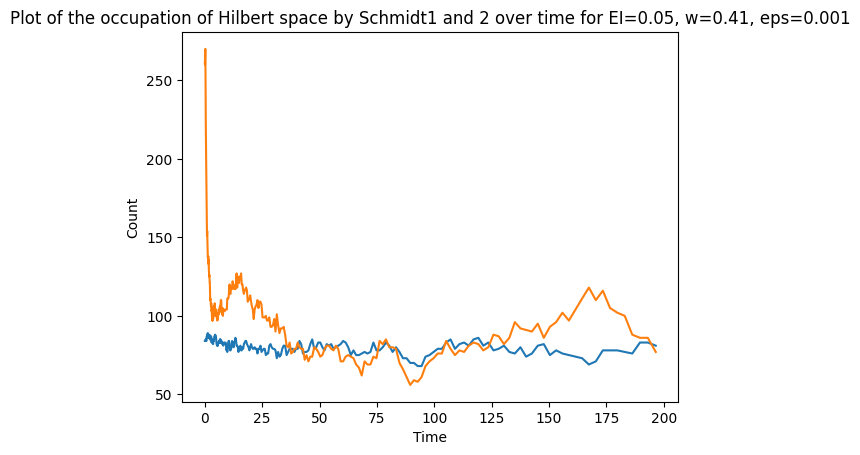

([84,
  84,
  84,
  84,
  84,
  84,
  84,
  84,
  84,
  84,
  84,
  84,
  84,
  84,
  84,
  84,
  85,
  85,
  85,
  84,
  84,
  84,
  85,
  85,
  84,
  84,
  84,
  84,
  84,
  84,
  84,
  86,
  85,
  87,
  87,
  87,
  87,
  86,
  86,
  87,
  87,
  88,
  88,
  88,
  88,
  89,
  89,
  88,
  87,
  87,
  86,
  86,
  86,
  86,
  86,
  86,
  87,
  87,
  86,
  86,
  87,
  87,
  88,
  87,
  86,
  86,
  85,
  85,
  85,
  86,
  87,
  87,
  87,
  87,
  87,
  86,
  86,
  83,
  84,
  84,
  85,
  84,
  84,
  83,
  83,
  82,
  82,
  83,
  84,
  84,
  84,
  85,
  87,
  87,
  87,
  87,
  88,
  87,
  86,
  87,
  86,
  84,
  82,
  82,
  81,
  82,
  81,
  81,
  83,
  83,
  83,
  84,
  84,
  83,
  85,
  83,
  85,
  83,
  83,
  84,
  83,
  82,
  83,
  82,
  81,
  82,
  83,
  83,
  82,
  82,
  83,
  81,
  78,
  79,
  77,
  79,
  83,
  84,
  84,
  82,
  78,
  78,
  79,
  80,
  84,
  83,
  83,
  80,
  83,
  84,
  86,
  85,
  81,
  81,
  80,
  77,
  80,
  80,
  81,
  78,
  78,
  80,
  79,
  82,
  83,
  84,
  84

In [61]:
occupation(tlist,result,eigenstates_total,eigenenergies_total,Int_strength,w,eps=0.001)

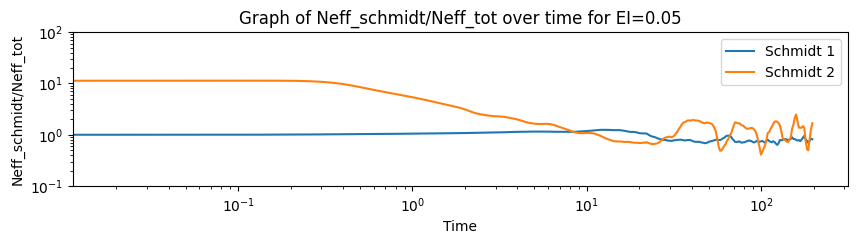

In [9]:
plot_Neff_schmidt_Neff_tot(H_total,result,tlist,Int_strength)


In [30]:

make_gif_distribs1s2_new(Int_strength,w,result,eigenstates_total,eigenenergies_total,[0],d1,d2,E_spacing,tmax,ind_nb)



[0]


In [31]:
from IPython.display import HTML

# Replace 'path_to_your_gif.gif' with the path to your GIF file
gif_path = f'/Users/maringirard/Dev/Quantum_Branching/Gifs/distrib_schmidt1_2_over_energy_spectrum_EI_{Int_strength}_w_{w}_env_NA_d1_10_d2_200_Espace_1.0_tmax_200_ind_nb_300.gif'

# Create HTML code to display the GIF
html_code = f'<img src="{gif_path}">'

# Display the GIF
display(HTML(html_code))


In [76]:
#strd_dev_mean_simi_plot(result,eigenstates_total,eigenenergies_total,Int_strength,w,[0], True)

In [72]:
#Trying to get exactly equal weights for both Schmidts.

#defining all quantities used in the simulation
d1, d2 = 10, 200
w = 0.41# smallest weight of the 2 eingestates, set btw 0 and 1
E_spacing = 1.0
Int_strength = 0.05001
# Define the time settings for the simulation
tmax= 200
ind_nb = 300
#q2=4
#q1=2*(np.sqrt(w)/np.sqrt(1-w)-1)+q2*np.sqrt(w)/np.sqrt(1-w)
#print(q1)
q1=1
q2=9
a=(2+q1)/np.sqrt(w)
b=(2+q2)/np.sqrt(1-w)
print(a)
print(b)

k0=round(q1)
k1=q2
print(k0)
print(k1)


4.685212856658182
14.320780207890625
1
9


In [73]:

result, tlist, H_q, H_system_2, H_system_1_ext, H_system_2_ext, H_interaction, H_total, ket_0, ket_1, initial_state_system_2 = generate_result_more(d1,d2,w, E_spacing, Int_strength, tmax, ind_nb,1,k0,k1)


In [74]:
eigenenergies_total, eigenstates_total = H_total.eigenstates() 


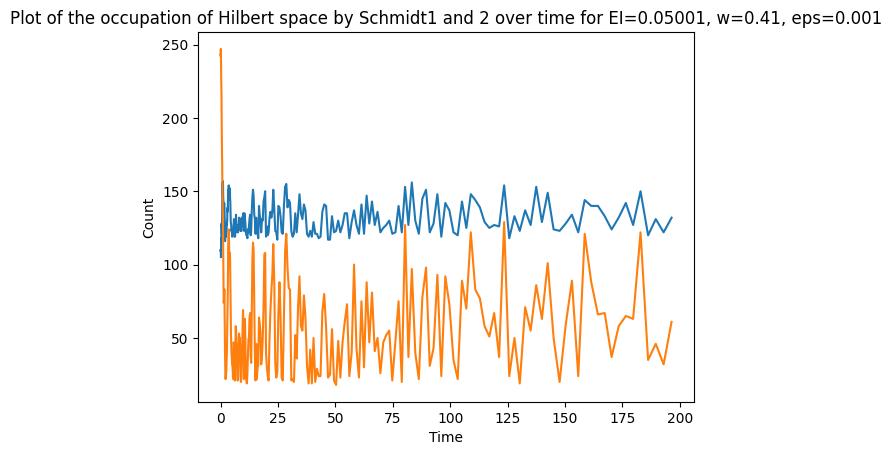

([110,
  109,
  109,
  110,
  108,
  108,
  105,
  105,
  109,
  112,
  113,
  118,
  115,
  116,
  119,
  122,
  124,
  124,
  126,
  128,
  127,
  125,
  127,
  123,
  123,
  121,
  124,
  130,
  136,
  143,
  146,
  149,
  156,
  151,
  147,
  147,
  150,
  156,
  157,
  156,
  154,
  148,
  146,
  145,
  143,
  142,
  141,
  137,
  139,
  136,
  137,
  140,
  142,
  142,
  140,
  135,
  135,
  132,
  127,
  124,
  116,
  116,
  120,
  123,
  123,
  124,
  123,
  120,
  119,
  121,
  123,
  123,
  123,
  129,
  127,
  130,
  130,
  138,
  136,
  139,
  138,
  151,
  147,
  148,
  146,
  154,
  148,
  149,
  146,
  144,
  151,
  152,
  145,
  143,
  134,
  129,
  128,
  127,
  123,
  124,
  122,
  119,
  123,
  123,
  121,
  122,
  125,
  129,
  131,
  122,
  119,
  119,
  119,
  127,
  129,
  134,
  125,
  127,
  125,
  122,
  123,
  122,
  124,
  128,
  132,
  128,
  129,
  131,
  123,
  124,
  123,
  132,
  132,
  130,
  135,
  127,
  123,
  135,
  132,
  128,
  122,
  120,
  120,

In [65]:
occupation(tlist,result,eigenstates_total,eigenenergies_total,Int_strength,w,eps=0.001)

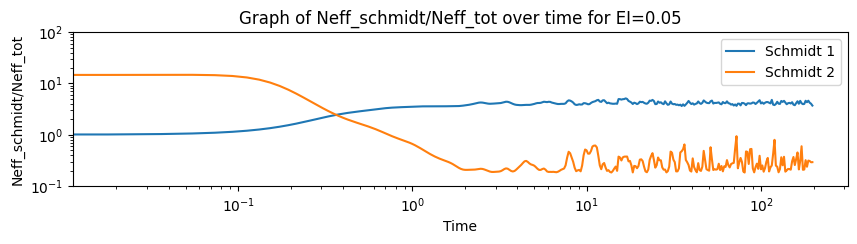

In [21]:
plot_Neff_schmidt_Neff_tot(H_total,result,tlist,Int_strength)


In [35]:

make_gif_distribs1s2_new(Int_strength,w,result,eigenstates_total,eigenenergies_total,[0],d1,d2,E_spacing,tmax,ind_nb)



[0]


In [36]:
from IPython.display import HTML

# Replace 'path_to_your_gif.gif' with the path to your GIF file
gif_path = f'/Users/maringirard/Dev/Quantum_Branching/Gifs/distrib_schmidt1_2_over_energy_spectrum_EI_{Int_strength}_w_{w}_env_NA_d1_10_d2_200_Espace_1.0_tmax_200_ind_nb_300.gif'

# Create HTML code to display the GIF
html_code = f'<img src="{gif_path}">'

# Display the GIF
display(HTML(html_code))


In [77]:
#strd_dev_mean_simi_plot(result,eigenstates_total,eigenenergies_total,Int_strength,w,[0], True)